In [1]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread

from gen.load_data import load_data

In [4]:
from sklearn.utils import shuffle

train_df, valid_df, test_df = load_data('../data')

train_df = shuffle(train_df)
valid_df = shuffle(valid_df)

print(train_df.head())


                                                image                   id  \
1438                  ../data/Train/CameraRGB/679.png                  679   
637   ../data/Train/CameraRGB/episode_0004_000046.png  episode_0004_000046   
70                    ../data/Train/CameraRGB/790.png                  790   
1555  ../data/Train/CameraRGB/episode_0000_000268.png  episode_0000_000268   
1331  ../data/Train/CameraRGB/episode_0004_000053.png  episode_0004_000053   

                                                label  
1438                  ../data/Train/CameraSeg/679.png  
637   ../data/Train/CameraSeg/episode_0004_000046.png  
70                    ../data/Train/CameraSeg/790.png  
1555  ../data/Train/CameraSeg/episode_0000_000268.png  
1331  ../data/Train/CameraSeg/episode_0004_000053.png  


In [5]:
from models.segnet import model_segnet, model_segnetVGG16

model = model_segnetVGG16(3, image_shape=(480, 480, 3))
model.summary()

/home/faisal/anaconda3/envs/ai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 480, 480, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 480, 480, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 480, 480, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 240, 240, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 240, 240, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 240, 240, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 120, 120, 128)     0         
__________

In [6]:
from gen.generators import train_and_lab_gen_func

BATCH_SIZE = 16

train_gen = train_and_lab_gen_func(train_df, image_size=(600, 800), target_size=(480, 480), batch_size = BATCH_SIZE)
valid_gen = train_and_lab_gen_func(valid_df, image_size=(600, 800), target_size=(480, 480), batch_size = BATCH_SIZE)


## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 2500 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 2500 images


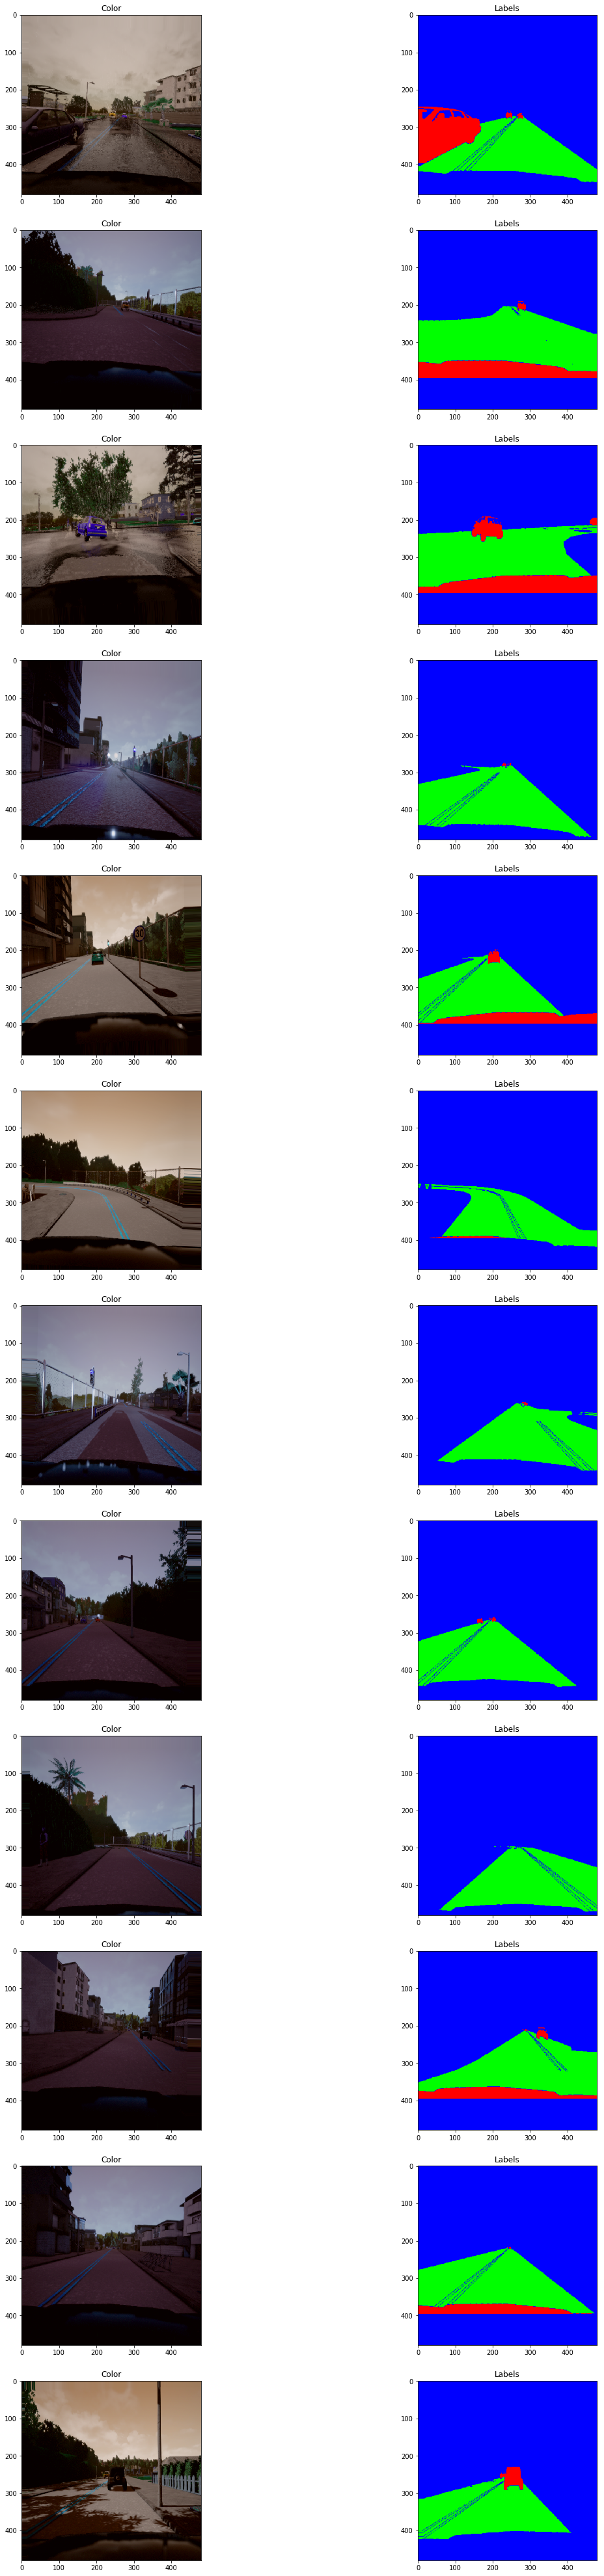

In [7]:
train_x, train_y = next(train_gen)

sample_rows = 12
fig, m_axs = plt.subplots(sample_rows, 2, figsize = (20, 6*sample_rows))
# [c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), rgb_img, lab_img in zip(m_axs, train_x, train_y):
    # undoing the vgg correction is tedious
    r_rgb_img = np.clip(rgb_img+110, 0, 255).astype(np.uint8)
    ax1.imshow(r_rgb_img)
    ax1.set_title('Color')
    ax2.imshow(lab_img)
    ax2.set_title('Labels')

In [8]:
from train import jaccard_distance_loss
from keras.optimizers import SGD, rmsprop

# opt =SGD(lr=1, momentum=0.01, decay=0.001, nesterov=False)
# opt = rmsprop(lr=0.0001, decay=1e-6)
# Let's train the model using RMSprop
# weights = np.array([10, 5, 1])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model.compile(optimizer = opt, 
#                    loss = jaccard_distance_loss,
#                    metrics = ['acc'])


In [9]:
X = np.expand_dims(train_x[0], 0)
Y = np.expand_dims(train_y[0], 0)
print (X.shape, Y.shape)

# model.reset_states()
model.fit(X, Y, epochs=100)

(1, 480, 480, 3) (1, 480, 480, 3)
Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 1.6375 - acc: 0.2706
Epoch 2/100
1/1 [==============================] - 0s 66ms/step - loss: 1.1164 - acc: 0.5119
Epoch 3/100
1/1 [==============================] - 0s 60ms/step - loss: 0.7021 - acc: 0.7412
Epoch 4/100
1/1 [==============================] - 0s 59ms/step - loss: 0.4737 - acc: 0.8733
Epoch 5/100
1/1 [==============================] - 0s 58ms/step - loss: 0.3567 - acc: 0.9620
Epoch 6/100
1/1 [==============================] - 0s 58ms/step - loss: 0.2851 - acc: 0.9682
Epoch 7/100
1/1 [==============================] - 0s 59ms/step - loss: 0.2493 - acc: 0.9744
Epoch 8/100
1/1 [==============================] - 0s 59ms/step - loss: 0.2213 - acc: 0.9756
Epoch 9/100
1/1 [==============================] - 0s 65ms/step - loss: 0.1972 - acc: 0.9785
Epoch 10/100
1/1 [==============================] - 0s 58ms/step - loss: 0.1790 - acc: 0.9806
Epoch 11/100
1/1 [===================

Epoch 88/100
1/1 [==============================] - 0s 58ms/step - loss: 0.0343 - acc: 0.9900
Epoch 89/100
1/1 [==============================] - 0s 65ms/step - loss: 0.0348 - acc: 0.9896
Epoch 90/100
1/1 [==============================] - 0s 59ms/step - loss: 0.0342 - acc: 0.9898
Epoch 91/100
1/1 [==============================] - 0s 60ms/step - loss: 0.0334 - acc: 0.9901
Epoch 92/100
1/1 [==============================] - 0s 59ms/step - loss: 0.0333 - acc: 0.9901
Epoch 93/100
1/1 [==============================] - 0s 59ms/step - loss: 0.0332 - acc: 0.9902
Epoch 94/100
1/1 [==============================] - 0s 59ms/step - loss: 0.0327 - acc: 0.9899
Epoch 95/100
1/1 [==============================] - 0s 60ms/step - loss: 0.0322 - acc: 0.9905
Epoch 96/100
1/1 [==============================] - 0s 59ms/step - loss: 0.0324 - acc: 0.9904
Epoch 97/100
1/1 [==============================] - 0s 58ms/step - loss: 0.0318 - acc: 0.9901
Epoch 98/100
1/1 [==============================] - 0s 59ms/

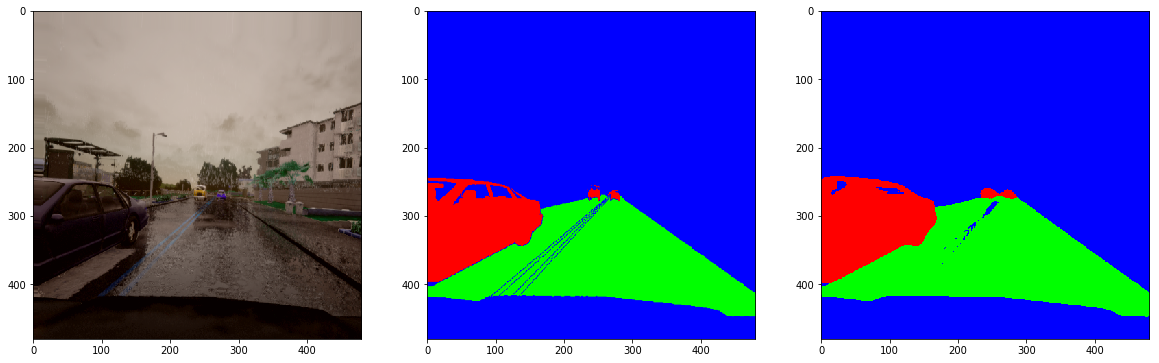

In [10]:
pred = model.predict(X)
pred = pred[0].argmax(axis=2)
pred_out = np.zeros_like(Y[0])
pred_out[:, :, 0] = pred == 0
pred_out[:, :, 1] = pred == 1
pred_out[:, :, 2] = pred == 2

plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(np.clip(X[0]+110, 0, 255).astype(np.uint8))
plt.subplot(132)
plt.imshow(Y[0])
plt.subplot(133)
plt.imshow(pred_out)